In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
movies_df = pd.read_csv('datasets/rotten_tomatoes_movies.csv')
movies_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
#check for missing values   
movies_df.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [5]:
movies_df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [6]:
movies_df['content_rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

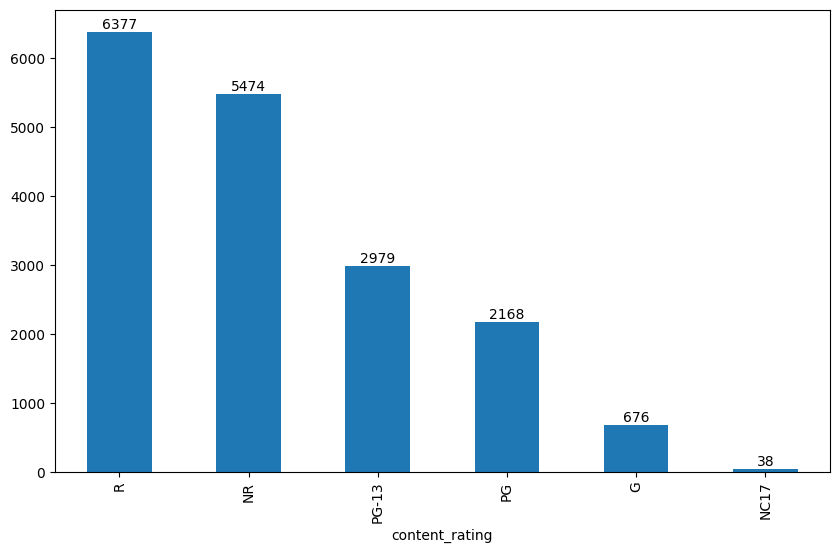

In [7]:
content_rating_plot = movies_df['content_rating'].value_counts().plot(kind='bar', figsize=(10, 6))
content_rating_plot.bar_label(content_rating_plot.containers[0])

[Text(0, 0, '9390'), Text(0, 0, '7874')]

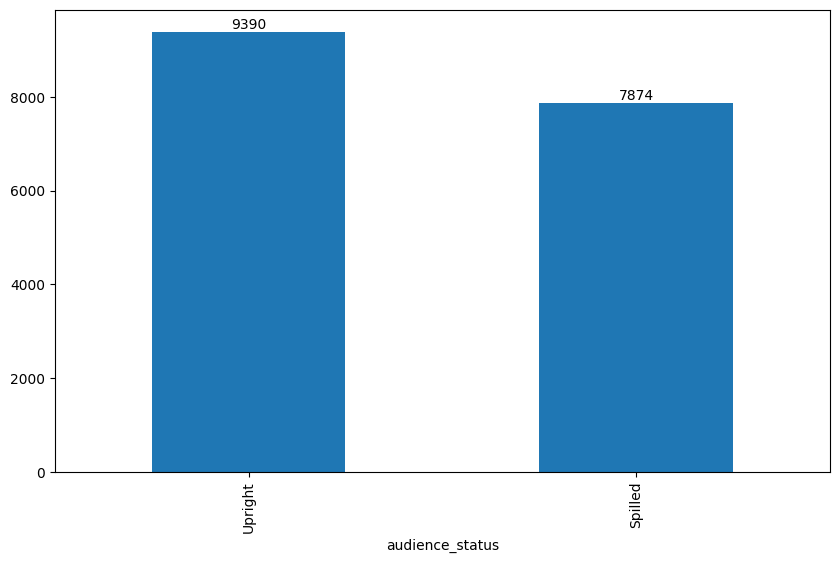

In [8]:
audience_status_plot = movies_df['audience_status'].value_counts().plot(kind='bar', figsize=(10, 6))
audience_status_plot.bar_label(audience_status_plot.containers[0])

In [9]:
# one hot encoding to content_rating feature
content_rating = pd.get_dummies(movies_df['content_rating'], dtype=int)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [10]:
audience_status = pd.DataFrame(movies_df['audience_status'].replace(['Spilled','Upright'],[0,1]))
audience_status.head()

/var/folders/cr/xjw6cygd26bg6_zk5_g0nscm0000gn/T/ipykernel_85264/27998538.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  audience_status = pd.DataFrame(movies_df['audience_status'].replace(['Spilled','Upright'],[0,1]))


,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [12]:
tomatometer_status = pd.DataFrame(movies_df['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status.head()

/var/folders/cr/xjw6cygd26bg6_zk5_g0nscm0000gn/T/ipykernel_85264/2067796997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tomatometer_status = pd.DataFrame(movies_df['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))


,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


In [13]:
feature_df = pd.concat([movies_df[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]
                        , content_rating, audience_status, tomatometer_status], axis=1).dropna()
feature_df.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [14]:
feature_df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

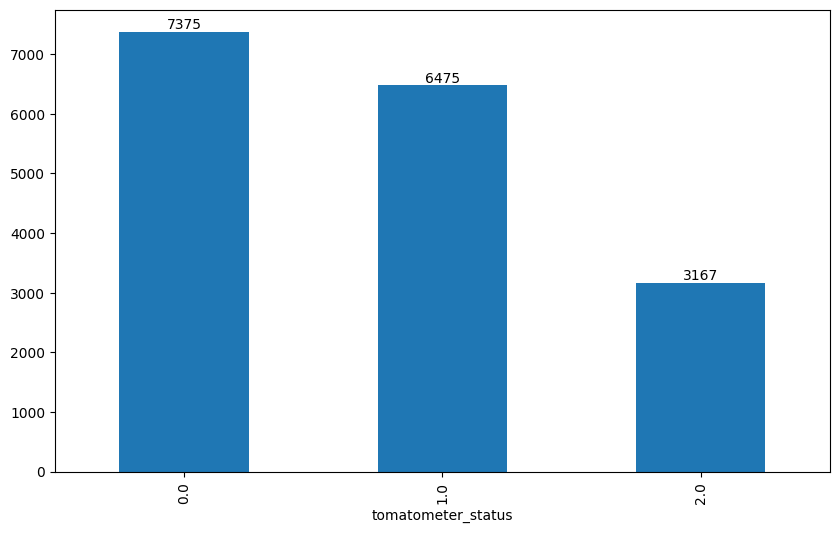

In [15]:
tomatometer_status_plot = feature_df['tomatometer_status'].value_counts().plot(kind='bar', figsize=(10, 6))
tomatometer_status_plot.bar_label(tomatometer_status_plot.containers[0])

In [16]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = feature_df.drop('tomatometer_status', axis=1)
y = feature_df['tomatometer_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=2)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9462397179788484

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



<Axes: >

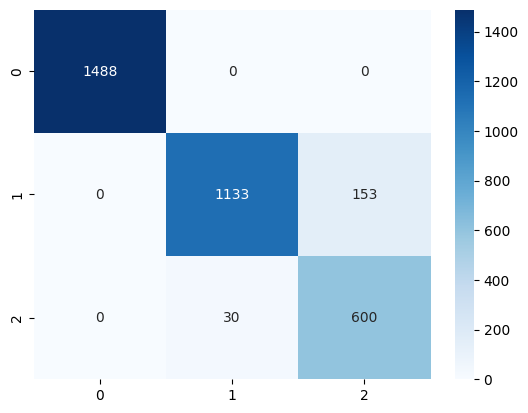

In [26]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

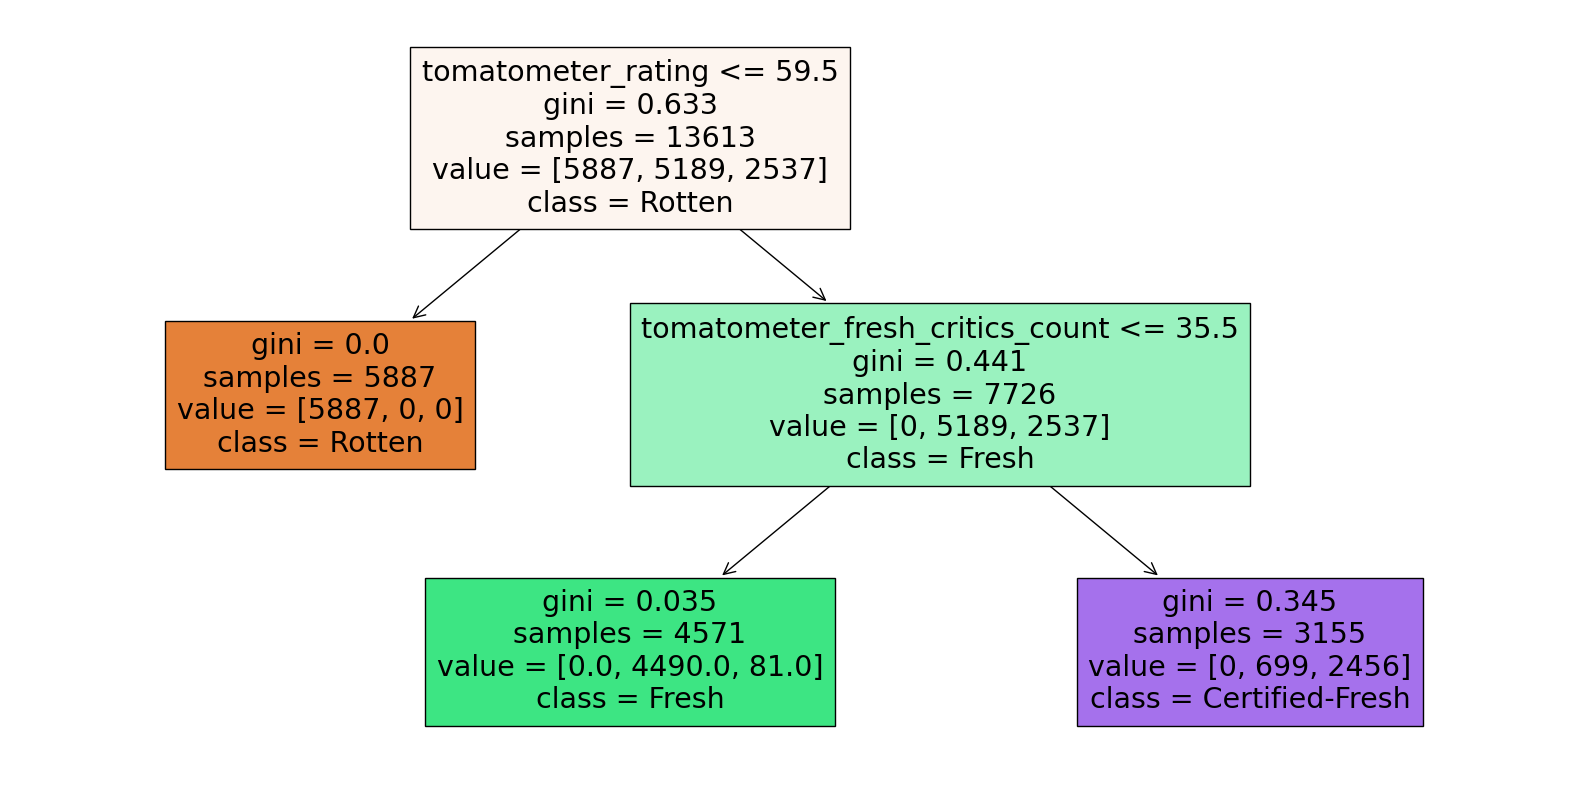

In [27]:
#plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Rotten','Fresh','Certified-Fresh'])
plt.show()

Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=2)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9911868390129259

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



<Axes: >

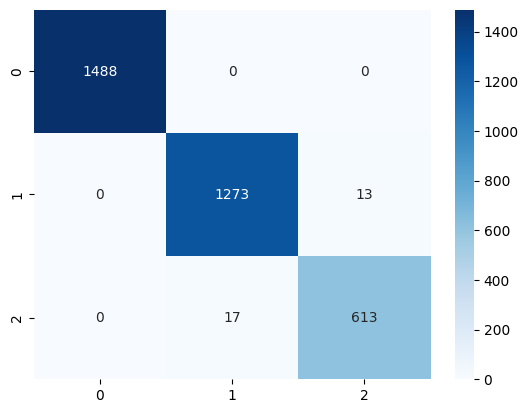

In [31]:
#plot confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Feature: runtime, Score: 0.006116739944983344
Feature: tomatometer_rating, Score: 0.47608504652994854
Feature: tomatometer_count, Score: 0.09880146707250363
Feature: audience_rating, Score: 0.05404262467299177
Feature: audience_count, Score: 0.016251677241949883
Feature: tomatometer_top_critics_count, Score: 0.03608963155901569
Feature: tomatometer_fresh_critics_count, Score: 0.14150645695305125
Feature: tomatometer_rotten_critics_count, Score: 0.13081343489058472
Feature: G, Score: 0.00029848189185319515
Feature: NC17, Score: 1.709061066955017e-05
Feature: NR, Score: 0.008711786826541734
Feature: PG, Score: 0.0005668613959766321
Feature: PG-13, Score: 0.002531466583040525
Feature: R, Score: 0.002232419076842232
Feature: audience_status, Score: 0.02593481475004731


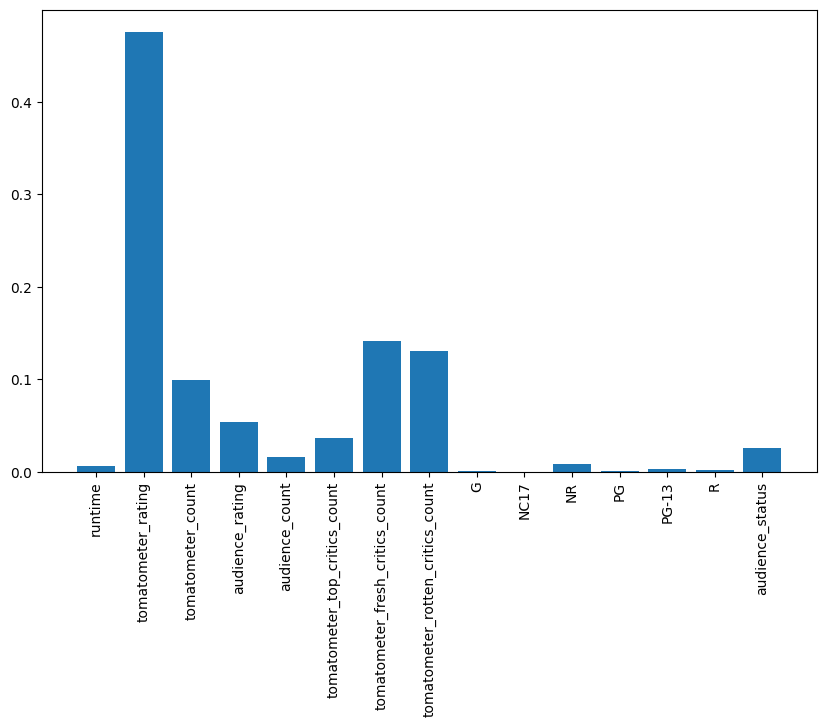

In [32]:
# get feature importance
importance = random_forest_model.feature_importances_

#print feature importance
for i,v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

#plot feature importance
plt.figure(figsize=(10, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), X.columns, rotation=90)
plt.show()